In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('insurance_claims.csv')

In [6]:
df.head(1)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN


In [7]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('Car_Insurance_Claim.csv')

In [9]:
df.head(1)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0


In [10]:

#Return number of rows and columns
df.shape

(10000, 19)

In [11]:
#Return first 5 rows of the dataset
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [12]:
#Return info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [13]:

#Display number missing values per column
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

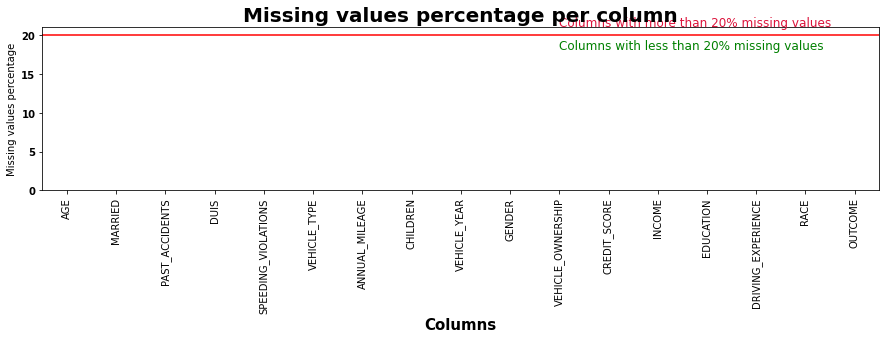

In [28]:

def msv_1(df, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (df.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(df.isnull().sum()/len(df))/1.7, thresh+2.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(df.isnull().sum()/len(df))/1.7, thresh - 0.5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(df, 20, color=sns.color_palette('Reds',15))

In [15]:
#Check the mean credit score for each income group
df.groupby(by="INCOME")["CREDIT_SCORE"].mean()

INCOME
middle class     0.523659
poverty          0.348331
upper class      0.613827
working class    0.431929
Name: CREDIT_SCORE, dtype: float64

In [16]:
#Create a function to impute missing values based on mean credit score for each income group
def impute_creditscore(income_classes):
    """This function takes a list of income groups and imputes the missing values of each based on the mean credit score for          each group"""
    #iterate through each income group
    for income_class in income_classes:      
        
        #create a subset of dataframe to use as filter
        mask = df["INCOME"] == income_class
        
        #calculate the mean for the income group
        mean = df[df["INCOME"] == income_class]["CREDIT_SCORE"].mean()
        
        #fill the missing values with mean of credit score for group
        df.loc[mask,"CREDIT_SCORE"] = df.loc[mask,'CREDIT_SCORE'].fillna(mean)

In [17]:
#Apply the function to the dataframe
income_groups = ["poverty","upper class","middle class","working class"]
impute_creditscore(income_groups)

In [18]:

#Display number missing values per column
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE             0
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [20]:

#Check the mean annual mileage for the different driving experience groups
df.groupby(by="DRIVING_EXPERIENCE")["ANNUAL_MILEAGE"].mean()

DRIVING_EXPERIENCE
0-9y      12249.131670
10-19y    11791.275168
20-29y    11144.181256
30y+      10694.968553
Name: ANNUAL_MILEAGE, dtype: float64

In [21]:
#Calculate mean for annual_mileage column
mean_mileage = df["ANNUAL_MILEAGE"].mean()

#Fill in null values using the column mean
df["ANNUAL_MILEAGE"].fillna(mean_mileage,inplace=True)

#Check for null values
df.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [22]:
df.head(1)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0


In [24]:
#Delete the id and postal_code columns
df.drop(["ID","POSTAL_CODE"],axis=1,inplace=True)

In [26]:
#Check the count for each category in the "gender" column
df["GENDER"].value_counts()

female    5010
male      4990
Name: GENDER, dtype: int64

In [27]:
#Check the count for each category in the "gender" column
df["OUTCOME"].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [29]:
df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515247,0.697000,0.498200,0.688800,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.134628,0.459578,0.500022,0.463008,2680.167384,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.421301,0.000000,0.000000,0.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.523659,1.000000,0.000000,1.000000,11697.003207,0.000000,0.00000,0.000000,0.000000
75%,0.613827,1.000000,1.000000,1.000000,13000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


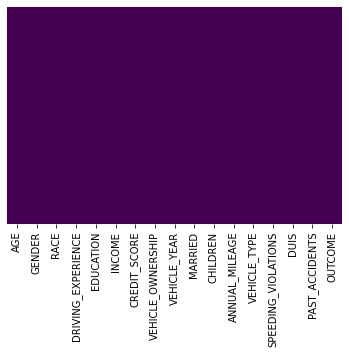

In [30]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [31]:
dont_claim_loan = len(df[df.OUTCOME == 1])
claim_loan = len(df[df.OUTCOME == 0])
print("Percentage of people who apply for a loan: {:.2f}%".format((dont_claim_loan / (len(df.OUTCOME))*100)))
print("Percentage of people who did not apply for a loan: {:.2f}%".format((claim_loan / (len(df.OUTCOME))*100)))

Percentage of people who apply for a loan: 31.33%
Percentage of people who did not apply for a loan: 68.67%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfe70c0a90>,
      dtype=object)

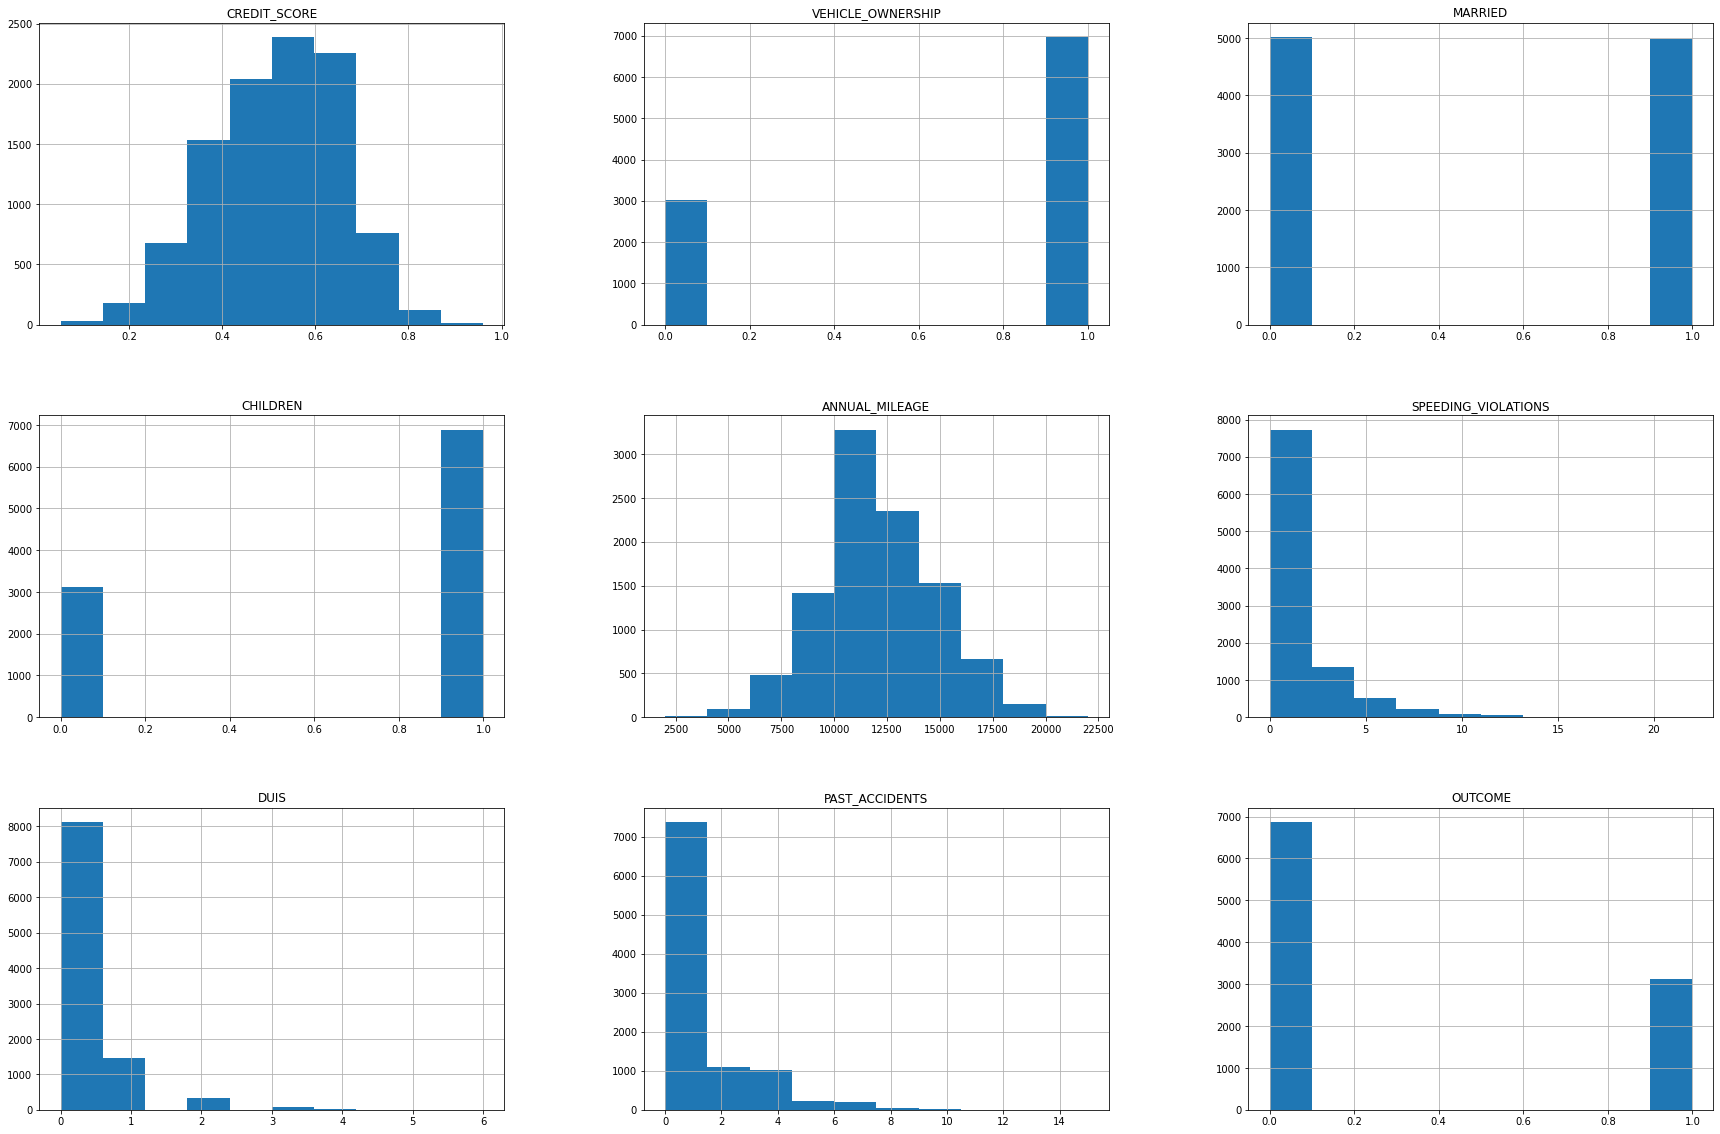

In [32]:
df.hist(figsize=(30,20))

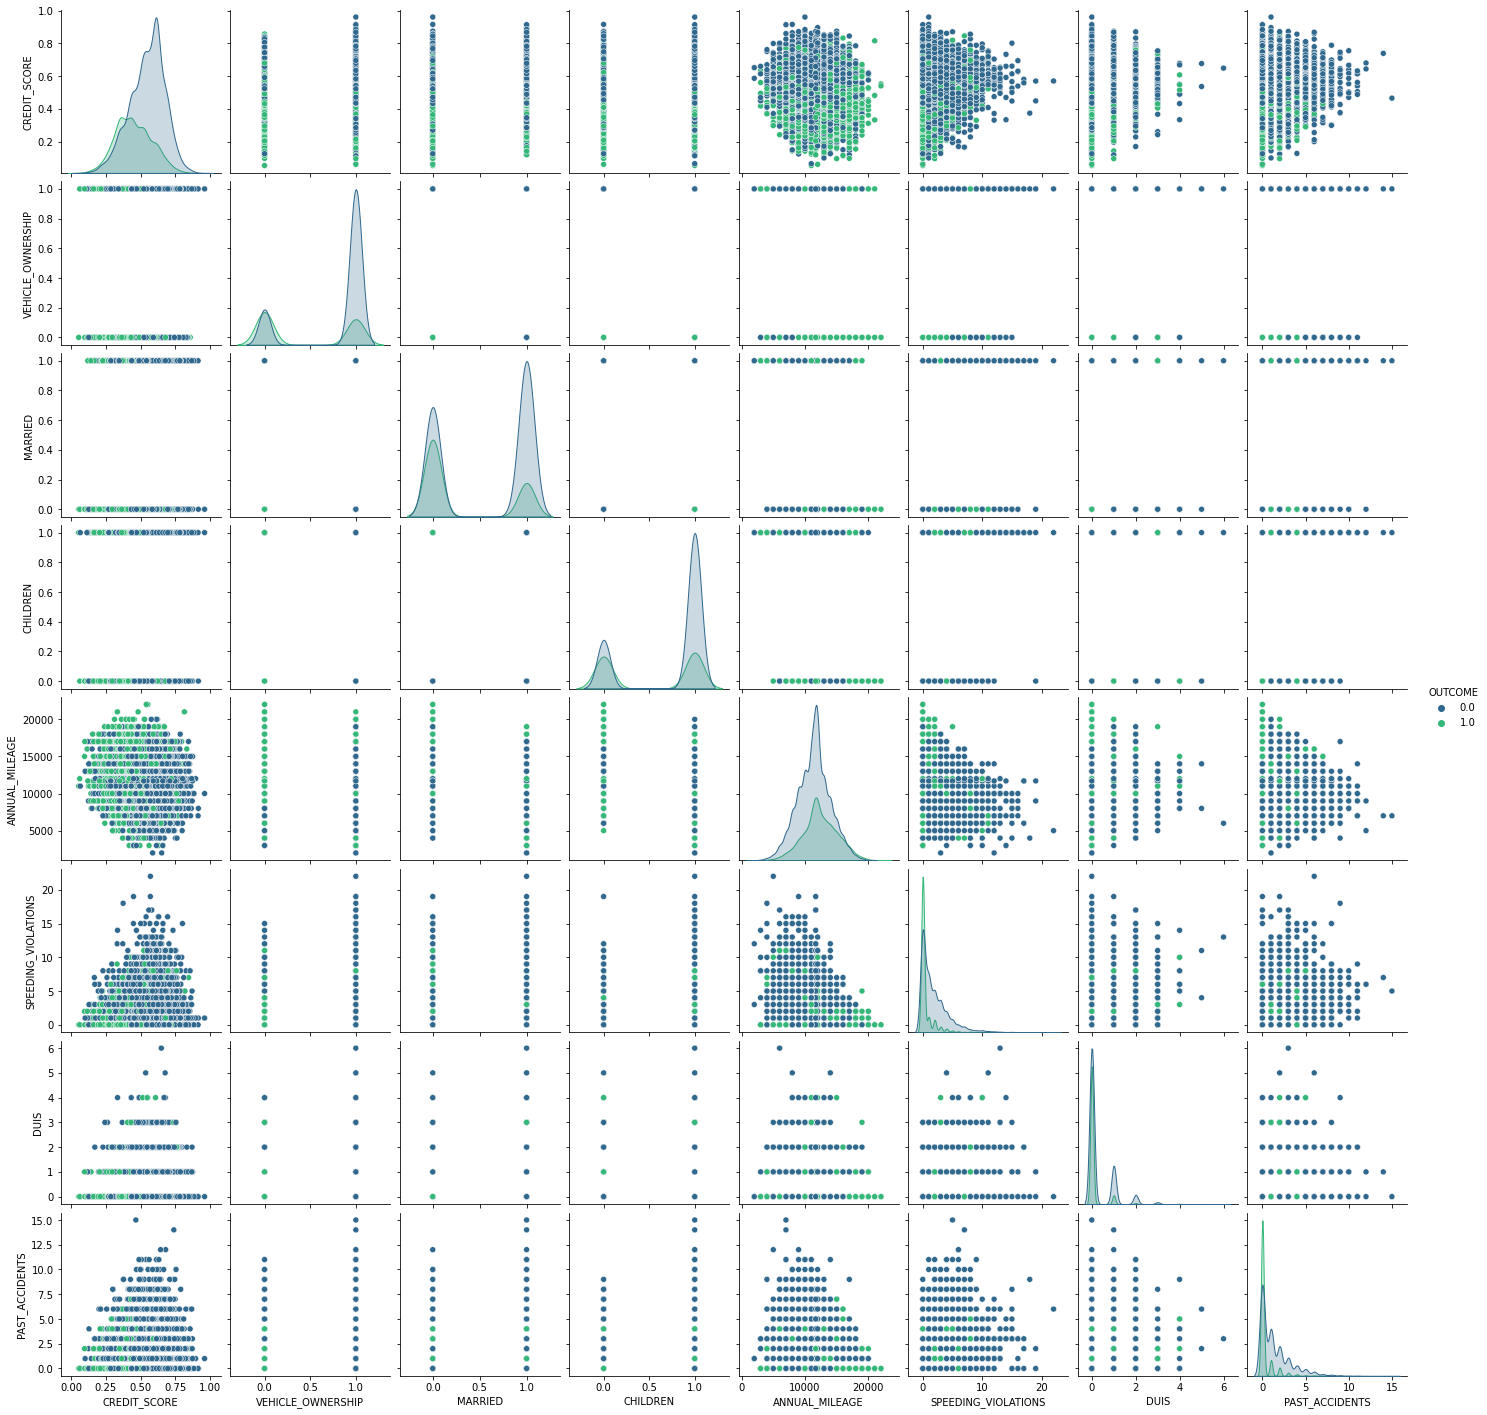

In [33]:
# pairploting
sns.pairplot(df, hue="OUTCOME", palette="viridis");

In [34]:
df_corr = df.corr().transpose()
df_corr

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
CREDIT_SCORE,1.000000,0.320804,0.291106,0.223769,-0.171065,0.212907,0.131418,0.185134,-0.332557
VEHICLE_OWNERSHIP,0.320804,1.000000,0.175626,0.125990,-0.092701,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.291106,0.175626,1.000000,0.287009,-0.439520,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.223769,0.125990,0.287009,1.000000,-0.425813,0.220415,0.115354,0.206295,-0.232835
ANNUAL_MILEAGE,-0.171065,-0.092701,-0.439520,-0.425813,1.000000,-0.308125,-0.111232,-0.187180,0.177575
SPEEDING_VIOLATIONS,0.212907,0.133868,0.218855,0.220415,-0.308125,1.000000,0.359838,0.443074,-0.291862
DUIS,0.131418,0.086567,0.120840,0.115354,-0.111232,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.185134,0.119521,0.215269,0.206295,-0.187180,0.443074,0.259359,1.000000,-0.311495
OUTCOME,-0.332557,-0.378921,-0.262104,-0.232835,0.177575,-0.291862,-0.189352,-0.311495,1.000000


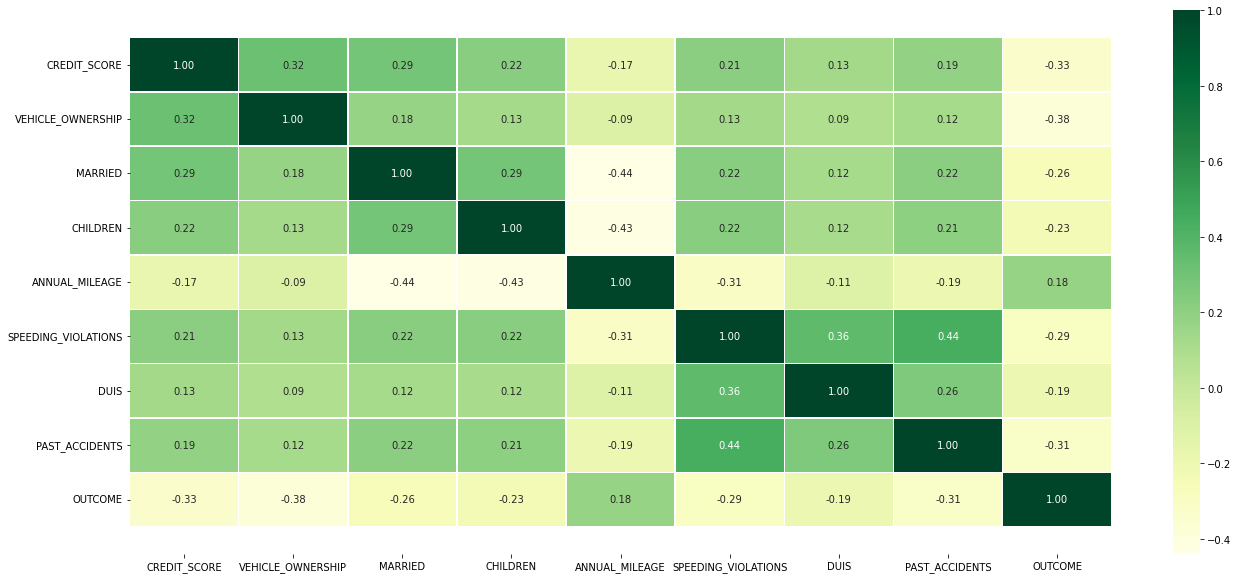

In [35]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

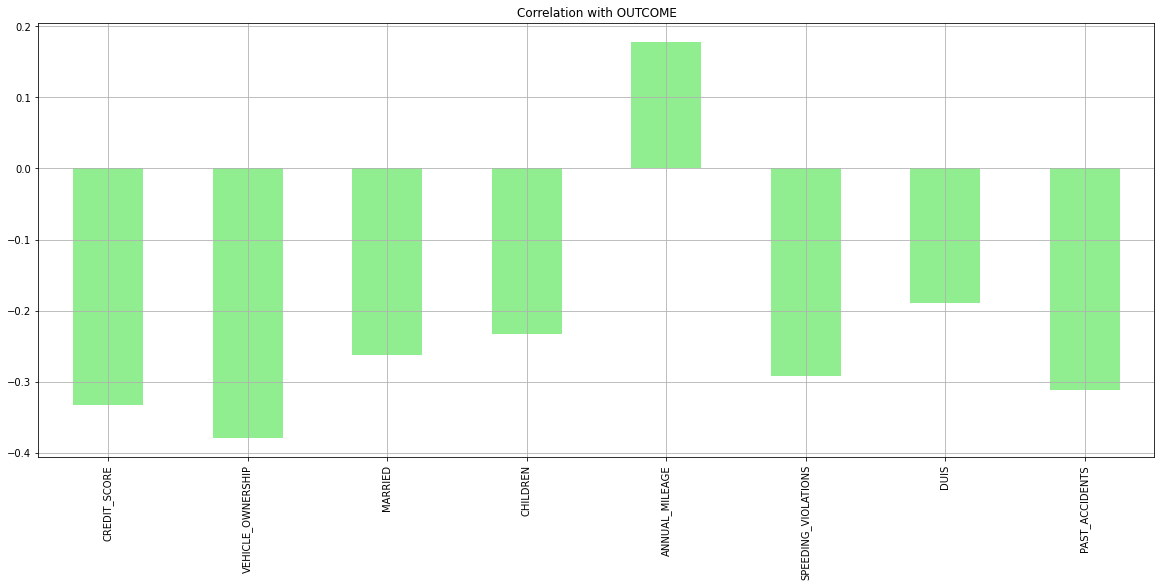

In [36]:
df.drop('OUTCOME', axis=1).corrwith(df.OUTCOME).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with OUTCOME",color="lightgreen");


Observations from correlation:

POSTAL_CODE, ID are the least correlated with the OUTCOME variable.
All other variables have a significant correlation with the OUTCOME variable.

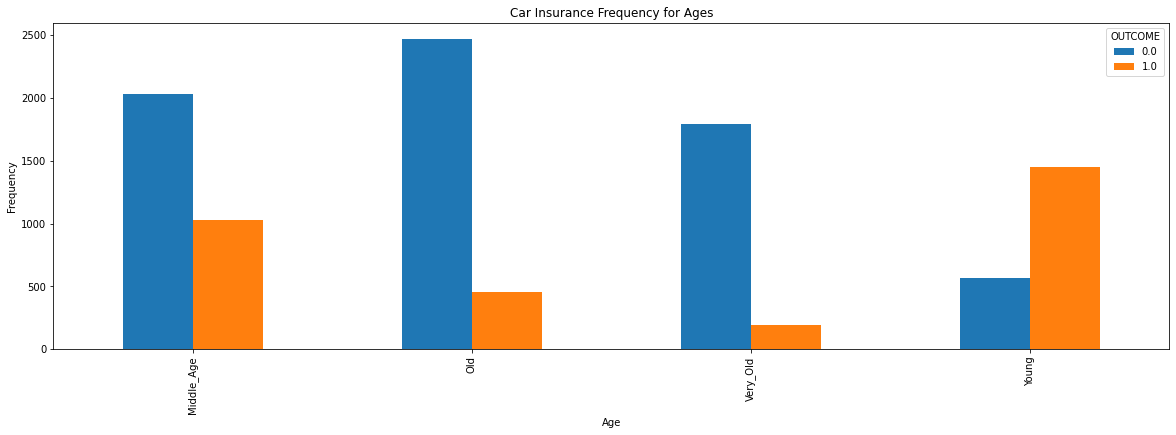

In [38]:
#Relationship Between Age vs OUTCOME
df["AGE"].replace({"16-25": "Young", "26-39": "Middle_Age","40-64":"Old","65+":"Very_Old"}, inplace=True)
pd.crosstab(df.AGE,df.OUTCOME).plot(kind="bar",figsize=(20,6))
plt.title('Car Insurance Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Here the Young people are more likely to claimed loan

In [39]:
pd.crosstab(df["OUTCOME"], df["AGE"])

AGE,Middle_Age,Old,Very_Old,Young
OUTCOME,,,,
0.0,2031,2474,1794,568
1.0,1032,457,196,1448


As we can see, age has a significant impact on car_insurance_data, with the greatest impact occurring between the ages of Middle_Age and Old.

Text(0.5, 1.0, 'Car_Insurance_Data Frequency for Gender')

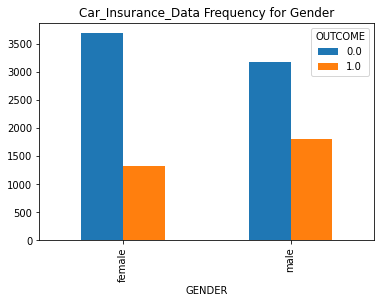

In [40]:
#Relationship Between GENDER vs OUTCOME
pd.crosstab(df.GENDER, df.OUTCOME).plot(kind = 'bar')
plt.title("Car_Insurance_Data Frequency for Gender")

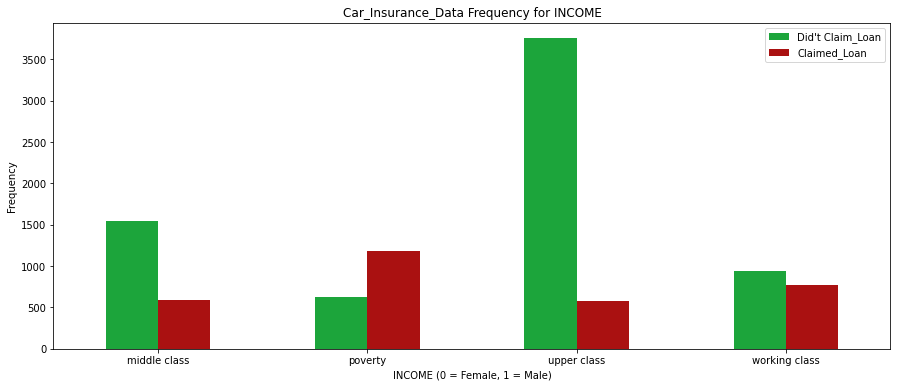

In [41]:
#Relationship Income and OUTCOME
pd.crosstab(df.INCOME,df.OUTCOME).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Car_Insurance_Data Frequency for INCOME')
plt.xlabel('INCOME (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Did't Claim_Loan", "Claimed_Loan"])
plt.ylabel('Frequency')
plt.show()

In [42]:
pd.crosstab(df["OUTCOME"], df["INCOME"])

INCOME,middle class,poverty,upper class,working class
OUTCOME,,,,
0.0,1546,628,3757,936
1.0,592,1186,579,776


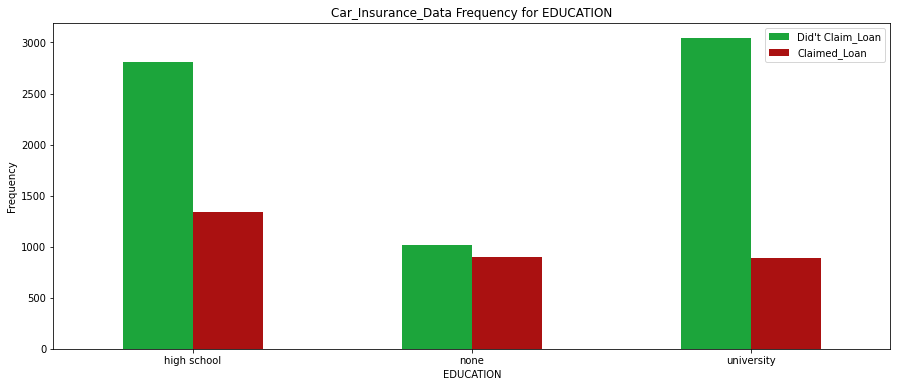

In [43]:
#Relationship Between Education and OUTCOME
pd.crosstab(df.EDUCATION,df.OUTCOME).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Car_Insurance_Data Frequency for EDUCATION')
plt.xlabel('EDUCATION')
plt.xticks(rotation=0)
plt.legend(["Did't Claim_Loan", "Claimed_Loan"])
plt.ylabel('Frequency')
plt.show()

In [44]:
pd.crosstab(df["OUTCOME"], df["EDUCATION"])

EDUCATION,high school,none,university
OUTCOME,,,
0.0,2813,1012,3042
1.0,1344,903,886


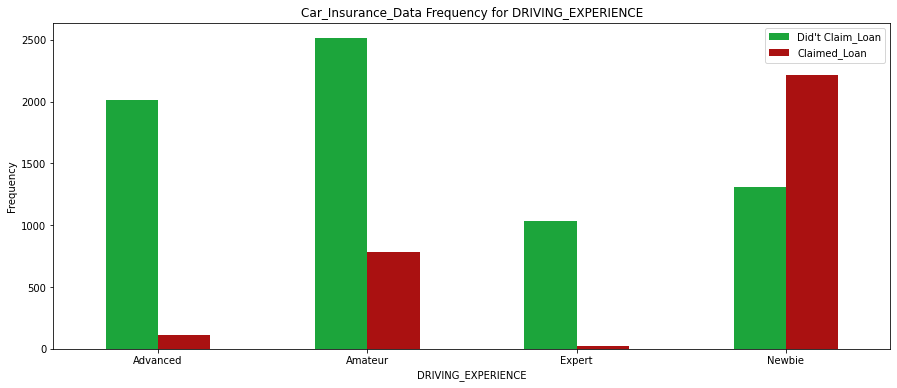

DRIVING_EXPERIENCE,Advanced,Amateur,Expert,Newbie
OUTCOME,,,,
0.0,2010,2512,1032,1313
1.0,109,787,20,2217


In [45]:
#Relationship Between DRIVING_EXPERIENCE and OUTCOME
df["DRIVING_EXPERIENCE"].replace({"0-9y": "Newbie", "10-19y": "Amateur","20-29y":"Advanced","30y+":"Expert"}, inplace=True)
pd.crosstab(df.DRIVING_EXPERIENCE,df.OUTCOME).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Car_Insurance_Data Frequency for DRIVING_EXPERIENCE')
plt.xlabel('DRIVING_EXPERIENCE')
plt.xticks(rotation=0)
plt.legend(["Did't Claim_Loan", "Claimed_Loan"])
plt.ylabel('Frequency')
plt.show()
pd.crosstab(df["OUTCOME"], df["DRIVING_EXPERIENCE"])

In [47]:
df.head(1)

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,Very_Old,female,majority,Newbie,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0


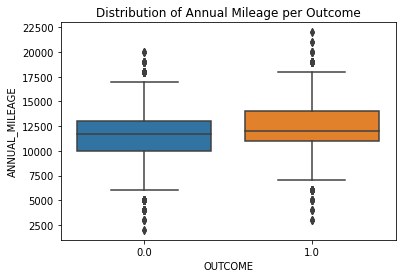

In [48]:
#Plot two boxplots to compare dispersion
sns.boxplot(data=df,x='OUTCOME', y='ANNUAL_MILEAGE')
plt.title("Distribution of Annual Mileage per Outcome")
plt.show()

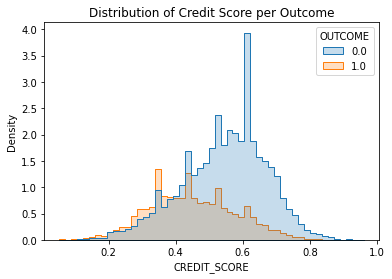

In [49]:
#Create histograms to compare distribution 
sns.histplot(df,x="CREDIT_SCORE",hue="OUTCOME",element="step",stat="density")
plt.title("Distribution of Credit Score per Outcome")
plt.show()

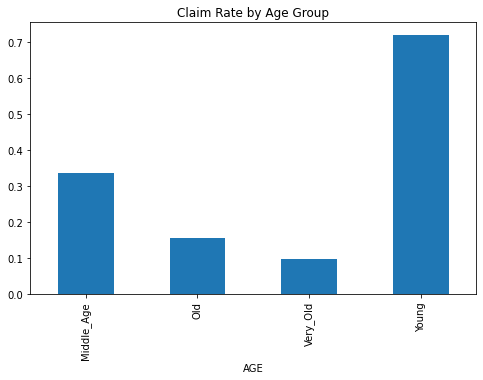

In [50]:
#Plot the average claim rate per age group
plt.figure(figsize=[8,5])
df.groupby('AGE')['OUTCOME'].mean().plot(kind="bar")
plt.title("Claim Rate by Age Group")
plt.show()

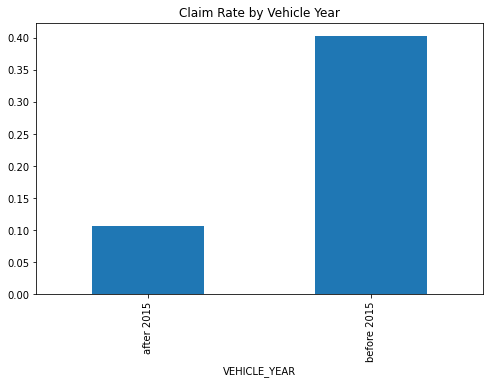

In [51]:
#Plot the average claim rate per vehicle year category
plt.figure(figsize=[8,5])
df.groupby('VEHICLE_YEAR')['OUTCOME'].mean().plot(kind="bar")
plt.title("Claim Rate by Vehicle Year")
plt.show()

In [52]:
df['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

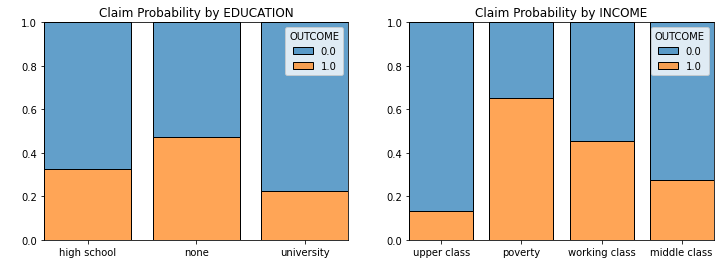

In [54]:
#Create an empty figure object
fig, axes = plt.subplots(1,2,figsize=(12,4))
		
#Plot two probability graphs for education and income
for i,col in enumerate(["EDUCATION","INCOME"]):
    sns.histplot(df, ax=axes[i],x=col, hue="OUTCOME",stat="probability", multiple="fill", shrink=.8,alpha=0.7)
    axes[i].set(title="Claim Probability by "+ col,ylabel=" ",xlabel=" ")

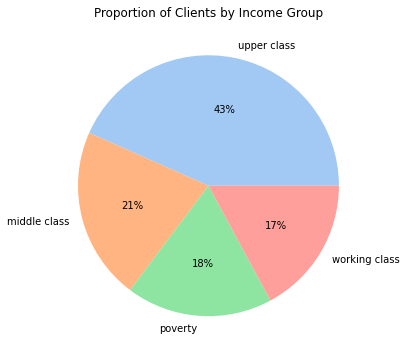

In [55]:
#Define plot size
plt.figure(figsize=[6,6])

#Define column to use
data = df["INCOME"].value_counts(normalize=True)

#Define labels
labels = ["upper class","middle class","poverty","working class"]

#Define color palette
colors = sns.color_palette('pastel')

#Create pie chart
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Proportion of Clients by Income Group")
plt.show()

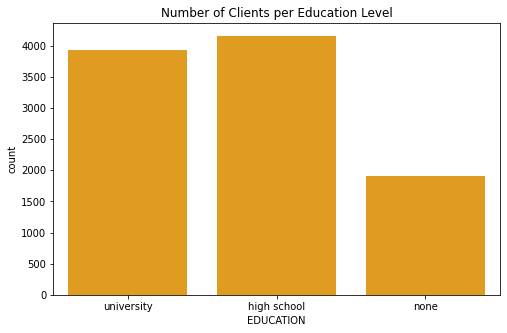

In [56]:
#Create a countplot to visualize the count of each category in the education column 
plt.figure(figsize=[8,5])
sns.countplot(data=df,x="EDUCATION",order=["university","high school","none"],color="orange")
plt.title("Number of Clients per Education Level")
plt.show()

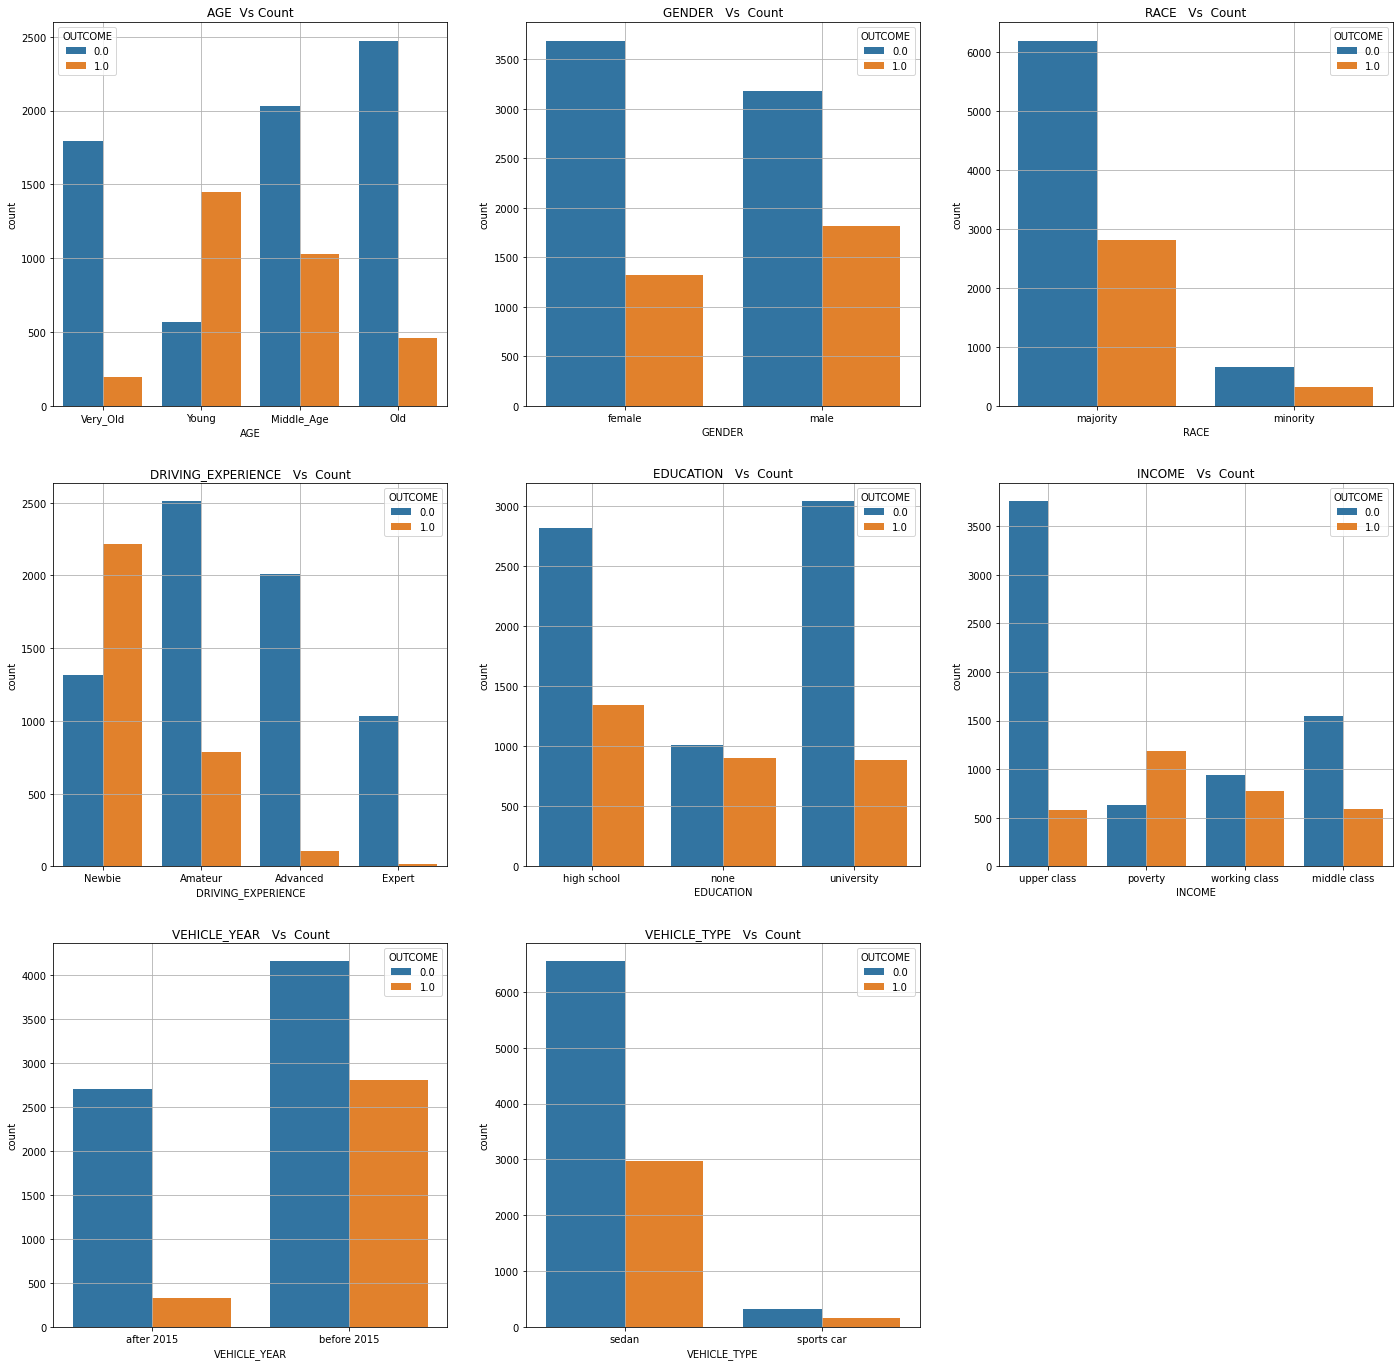

In [58]:
# Countplot of Object Data Type Features 

fig = plt.figure(figsize=(24, 24))
plt.subplots_adjust(hspace = 0.2)

plt.subplot(331)
ax1 = sns.countplot(x='AGE', data=df, hue='OUTCOME')
plt.title('AGE  Vs Count')
plt.grid()

plt.subplot(332)
ax2 = sns.countplot(x='GENDER', data=df, hue='OUTCOME')
plt.title('GENDER   Vs  Count')
plt.grid()

plt.subplot(333)
ax3 = sns.countplot(x='RACE', data=df, hue='OUTCOME')
plt.title('RACE   Vs  Count')
plt.grid()

plt.subplot(334)
ax4 = sns.countplot(x='DRIVING_EXPERIENCE', data=df, hue='OUTCOME')
plt.title('DRIVING_EXPERIENCE   Vs  Count')
plt.grid()

plt.subplot(335)
ax4 = sns.countplot(x='EDUCATION', data=df, hue='OUTCOME')
plt.title('EDUCATION   Vs  Count')
plt.grid()

plt.subplot(336)
ax4 = sns.countplot(x='INCOME', data=df, hue='OUTCOME')
plt.title('INCOME   Vs  Count')
plt.grid()

plt.subplot(337)
ax4 = sns.countplot(x='VEHICLE_YEAR', data=df, hue='OUTCOME')
plt.title('VEHICLE_YEAR   Vs  Count')
plt.grid()

plt.subplot(338)
ax4 = sns.countplot(x='VEHICLE_TYPE', data=df, hue='OUTCOME')
plt.title('VEHICLE_TYPE   Vs  Count')
plt.grid()

plt.show()


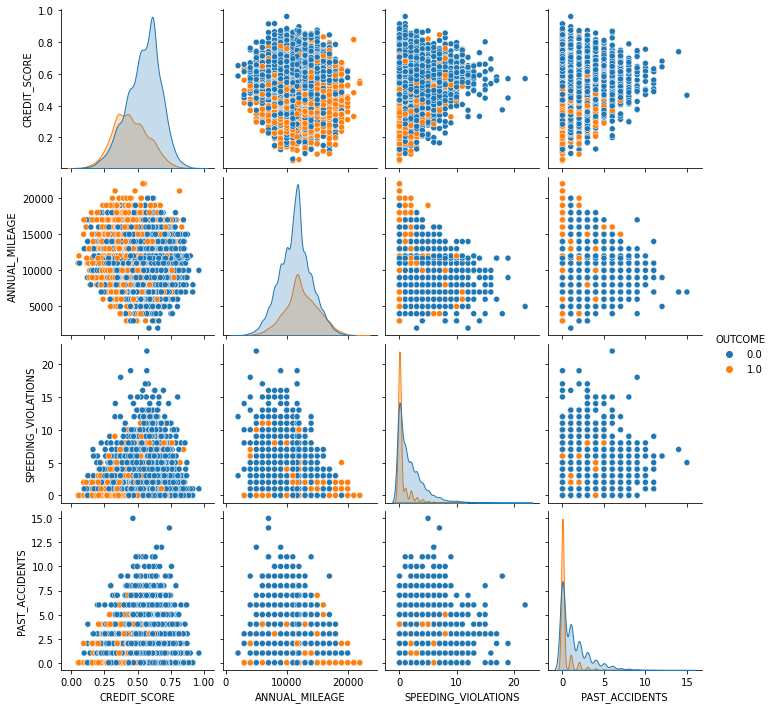

In [60]:
# Non-Binary features - pairplot
sns.pairplot(df[['CREDIT_SCORE','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','PAST_ACCIDENTS','OUTCOME']],hue='OUTCOME')

In [62]:
X = df.drop(['OUTCOME'], axis=1)
y = df['OUTCOME']
X = pd.get_dummies(X, drop_first=True)

In [63]:
# Splitting data into training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train.head(1)

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE_Old,AGE_Very_Old,...,DRIVING_EXPERIENCE_Amateur,DRIVING_EXPERIENCE_Expert,DRIVING_EXPERIENCE_Newbie,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sports car
9254,0.545417,1.0,1.0,1.0,8000.0,4,0,6,0,1,...,0,1,0,0,0,0,1,0,0,0


In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 23)
(2000, 23)
(8000,)
(2000,)


In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report,classification_report, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from statistics import mean
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import norm
from functools import partial
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.weightstats import ztest
import math
from IPython.display import Image 
from sklearn import tree
import pydotplus
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn .datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2,f_classif
import missingno as msno
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.impute import SimpleImputer 
from collections import Counter
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_auc_score , roc_curve
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import precision_score, recall_score,confusion_matrix,accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_samples, silhouette_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings('ignore')







/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [72]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#Parameter list
parameters={'learning_rate':[0.1,0.15,0.2,0.25,0.3],
            'max_depth':range(1,3)}

# Code starts here
xgb_model=XGBClassifier(random_state=0) 
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
xgb_score=accuracy_score(y_test,y_pred)
xgb_cm=confusion_matrix(y_test,y_pred)
xgb_cr=classification_report(y_test,y_pred)
print(xgb_score)
print(xgb_cm)
print(xgb_cr)



0.84
[[1237  130]
 [ 190  443]]
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1367
         1.0       0.77      0.70      0.73       633

    accuracy                           0.84      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.84      0.84      0.84      2000



In [78]:
from sklearn.metrics import confusion_matrix,classification_report,classification_report, f1_score
from sklearn import metrics

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1367
         1.0       0.75      0.63      0.69       633

    accuracy                           0.82      2000
   macro avg       0.80      0.77      0.78      2000
weighted avg       0.81      0.82      0.81      2000

[[1237  130]
 [ 234  399]]
Accuracy of prediction: 0.818
F1 score of model is               0.8131901644633501


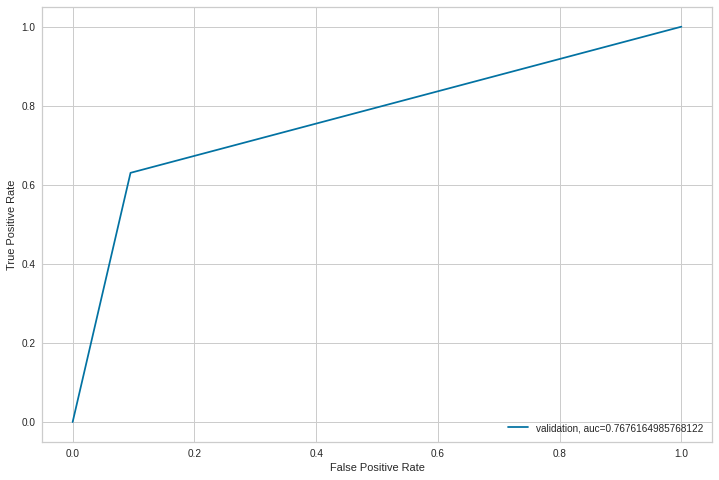

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

ran_pred = rfc.predict(X_test)

print(classification_report(y_test,ran_pred))
cm=confusion_matrix(y_test,ran_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print('F1 score of model is              ',f1_score(y_test,ran_pred,average='weighted'))

fpr, tpr, _ = metrics.roc_curve(y_test, ran_pred)
auc = metrics.roc_auc_score(y_test, ran_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      1367
         1.0       0.72      0.78      0.75       633

    accuracy                           0.84      2000
   macro avg       0.81      0.82      0.82      2000
weighted avg       0.84      0.84      0.84      2000

[[1177  190]
 [ 137  496]]
Accuracy of prediction: 0.836
F1 score of model is               0.8381687801644628


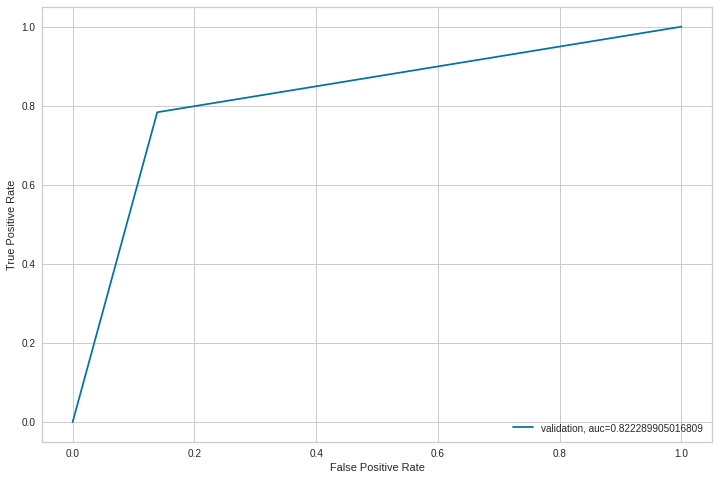

In [92]:
rfc1 = RandomForestClassifier(class_weight={0:1,1:1.8},
                       criterion='gini', max_depth=120,
                       min_samples_leaf=6, min_samples_split=5, n_estimators=1400)
rfc1.fit(X_train, y_train)
rfc1_pred = rfc1.predict(X_test)



print(classification_report(y_test,rfc1_pred))

cm=confusion_matrix(y_test,rfc1_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print('F1 score of model is              ',f1_score(y_test,rfc1_pred,average='weighted'))

fpr, tpr, _ = metrics.roc_curve(y_test, rfc1_pred)
auc = metrics.roc_auc_score(y_test, rfc1_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [85]:
df['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [91]:
3133*2.2

6892.6

In [96]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
